In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fer2013/fer2013.csv


In [42]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import cv2
import seaborn as sns

In [43]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df=pd.read_csv('/kaggle/input/fer2013/fer2013.csv')

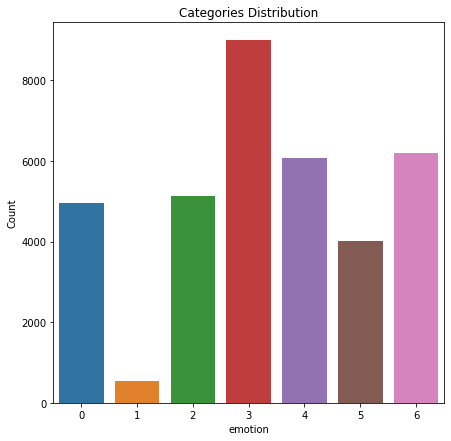

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64
(0=Angry, 1=Fear, 2=Happy, 3=Sad, 4=Surprise, 5=Neutral)


In [44]:
plt.figure(figsize = (7,7))
# Count the number of images per category
sns.countplot(x = df['emotion'], data = df)
# Change the Axis names
plt.ylabel('Count')
plt.title('Categories Distribution')
# Show plot
plt.show()

print(df['emotion'].value_counts())
print('(0=Angry, 1=Fear, 2=Happy, 3=Sad, 4=Surprise, 5=Neutral)')

In [65]:
#print(df.info())
print(df["Usage"].value_counts())

# print(df.head())
X_train,train_y,X_test,test_y, X_val, val_y=[],[],[],[],[],[]

for index, row in df.iterrows():
    value=row['pixels'].split(" ")
    try:
        if row['emotion'] == 1 or row['emotion'] == 2:
            continue
        else:
            if 'Training' in row['Usage']:
                X_train.append(np.array(value,'float32'))
                train_y.append(row['emotion'])
            elif 'PrivateTest' in row['Usage']:
                X_val.append(np.array(value,'float32'))
                val_y.append(row['emotion'])
            elif 'PublicTest' in row['Usage']:
                X_test.append(np.array(value,'float32'))
                test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64


In [66]:
len(X_train), len(X_val), len(X_test)

(24176, 3006, 3037)

In [67]:
len(train_y), len(val_y), len(test_y)

(24176, 3006, 3037)

In [68]:
y_test = []
for i in test_y:
    if i == 1 or i == 2:
        print('Haha')
    if i>0 :
        y_test.append(i-2)
    else:
        y_test.append(i)

In [69]:
y_val = []
for i in val_y:
    if i == 1 or i == 2:
        print('Haha')
    if i>0 :
        y_val.append(i-2)
    else:
        y_val.append(i)

In [70]:
y_train = []
for i in train_y:
    if i == 1 or i == 2:
        print('Haha')
    if i>0 :
        y_train.append(i-2)
    else:
        y_train.append(i)

In [71]:
len(y_train), len(y_val), len(y_test)

(24176, 3006, 3037)

In [52]:
y_test[:5], y_train[:5], y_val[:5]

([0, 3, 5, 2, 2], [0, 0, 1, 3, 5], [0, 4, 5, 3, 1])

In [72]:
activity_map = {'0': 'Angry', 
                '1': 'Happy', 
                '2': 'Sad', 
                '3': 'Surprise', 
                '4': 'Neutral'}
#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

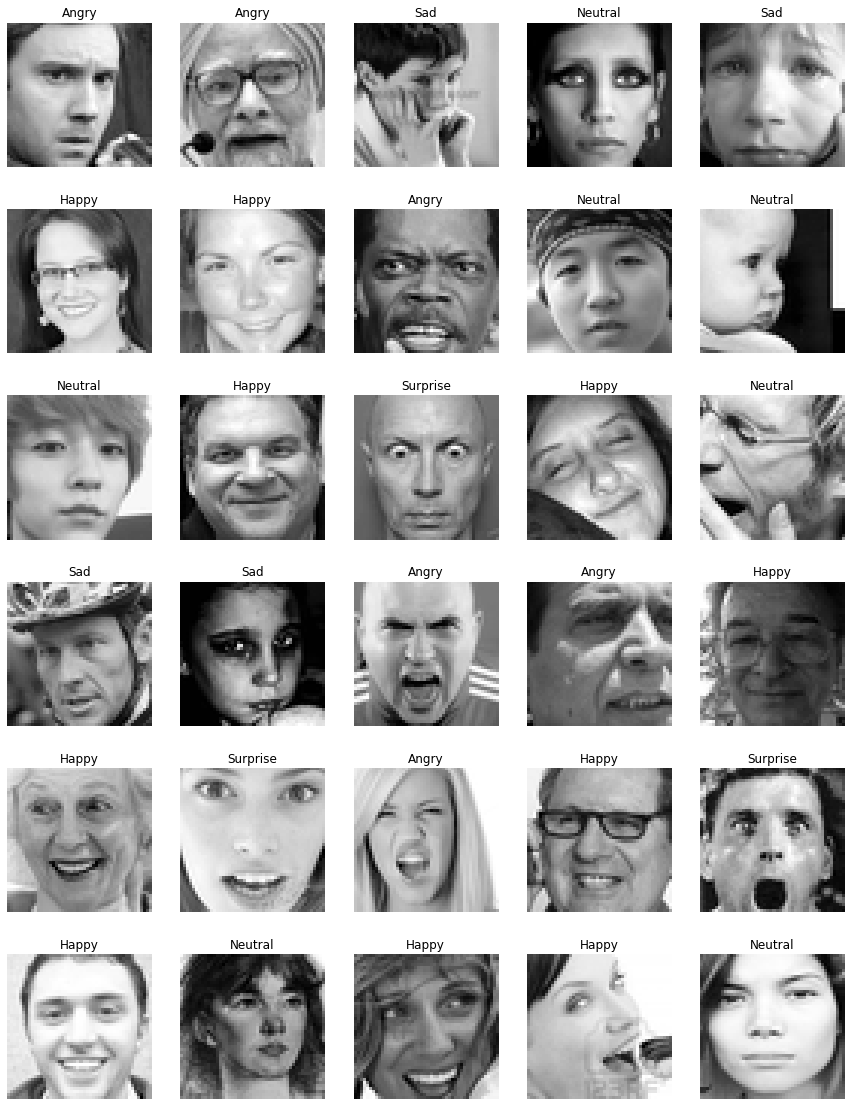

In [73]:
import math
n = 30
random_indices = np.random.permutation(n)
n_cols = 5
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
for i, img in enumerate(random_indices):
    ax = axes.flat[i]
    img_show = cv2.resize(X_train[i].reshape(48, 48),(48,48))
    ax.imshow(img_show, cmap='gray')
    ax.axis("off")
    ax.set_title(activity_map.get('{}'.format(y_train[i])))
    ax.set_xticks([])
    ax.set_yticks([])

In [74]:
num_features = 64
num_labels = 5
width, height = 48, 48

X_train = np.array(X_train,'float32')
y_train = np.array(y_train,'float32')

X_val = np.array(X_val,'float32')
y_val = np.array(y_val,'float32')

X_test = np.array(X_test,'float32')
y_test = np.array(y_test,'float32')

y_train=np_utils.to_categorical(y_train, num_classes=num_labels)
y_val=np_utils.to_categorical(y_val, num_classes=num_labels)
y_test=np_utils.to_categorical(y_test, num_classes=num_labels)

#cannot produce
#normalizing data between 0 and 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_val -= np.mean(X_val, axis=0)
X_val /= np.std(X_val, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [75]:
print(f"X_train shape:{X_train.shape}")
print(f"X_val shape:{X_val.shape}")
print(f"X_test shape:{X_test.shape}")

print(f"shape:{y_train.shape}")
print(f"shape:{y_val.shape}")
print(f"shape:{y_test.shape}")

X_train shape:(24176, 48, 48, 1)
X_val shape:(3006, 48, 48, 1)
X_test shape:(3037, 48, 48, 1)
shape:(24176, 5)
shape:(3006, 5)
shape:(3037, 5)


In [76]:
import keras
from keras.datasets import cifar10, mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Activation, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [79]:
input_shape = (48, 48, 1)
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv2D(5, (3, 3), activation='relu', padding='same')(x)
x = GlobalAveragePooling2D()(x)
output_cls = Activation(activation='softmax')(x)

model = Model(input_img, output_cls)

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0   

In [80]:
import tensorflow as tf
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_val, y_val))

Train on 24176 samples, validate on 3006 samples
Epoch 1/50
24176/24176 [==============================] - 11s 439us/step - loss: 1.2462 - accuracy: 0.4840 - val_loss: 1.0322 - val_accuracy: 0.5902
Epoch 2/50
24176/24176 [==============================] - 9s 382us/step - loss: 0.9887 - accuracy: 0.6098 - val_loss: 1.0298 - val_accuracy: 0.5915
Epoch 3/50
24176/24176 [==============================] - 9s 375us/step - loss: 0.8962 - accuracy: 0.6504 - val_loss: 0.9744 - val_accuracy: 0.6198
Epoch 4/50
24176/24176 [==============================] - 9s 373us/step - loss: 0.8256 - accuracy: 0.6804 - val_loss: 0.8721 - val_accuracy: 0.6540
Epoch 5/50
24176/24176 [==============================] - 9s 379us/step - loss: 0.7732 - accuracy: 0.7015 - val_loss: 0.8774 - val_accuracy: 0.6677
Epoch 6/50
24176/24176 [==============================] - 9s 376us/step - loss: 0.7311 - accuracy: 0.7203 - val_loss: 0.9025 - val_accuracy: 0.6534
Epoch 7/50
24176/24176 [==============================] - 9s 3

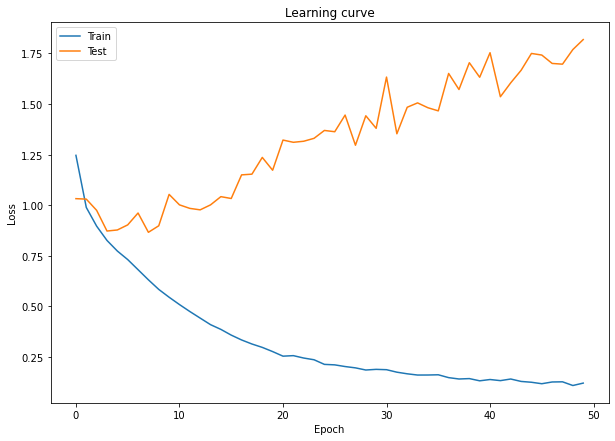

In [81]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
/

plt.title('Learning curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()

In [82]:
fmaps_fn = K.function(model.input, model.layers[-3].output)
props_fn = K.function(model.input, model.layers[-1].output)

In [83]:
def get_props_fmaps(inp):
    props = props_fn(inp)
    fmaps = fmaps_fn(inp)[0,:]
    return props, fmaps    

In [84]:
cls_names = ['Angry', 
                'Happy', 
                'Sad', 
                'Surprise', 
                'Neutral']

TypeError: list indices must be integers or slices, not tuple

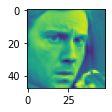

In [85]:
fig=plt.figure(figsize=(17, 17))
columns = 10
rows = 10
for i in range(rows * columns):
    ax = fig.add_subplot(rows, columns, i+1)
    plt.imshow(X_train[i].squeeze())
    plt.title(str(i)+ ":" + cls_names[np.argmax(train_y[i,:])])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


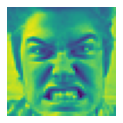

In [120]:
inp = X_test[31]
inp = np.expand_dims(inp, axis=0)
plt.figure(figsize=(2, 2))
ax = fig.add_subplot()
plt.imshow(inp.squeeze())
plt.axis('off')
plt.show()

0 Angry


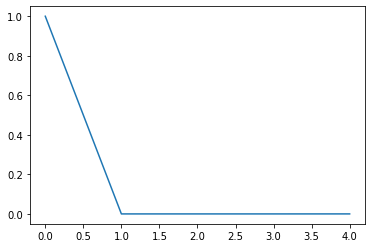

In [121]:
props, _ =  get_props_fmaps(inp)
print(np.argmax(props), cls_names[np.argmax(props)])
plt.plot(props.squeeze())

In [122]:
np.argmax(test_y[8])

0

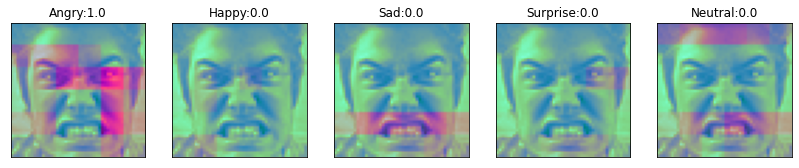

In [123]:
fig=plt.figure(figsize=(14, 7))
columns = 5
rows = 2

props, fmaps = get_props_fmaps(inp)
props = np.round(props.squeeze(),3)

for i in range(props.shape[0]):
  ax = fig.add_subplot(rows, columns, i+1)
  plt.imshow(inp.squeeze(), cmap = 'inferno')
  overlay = np.array(Image.fromarray((fmaps[:,:,i]).astype("uint8")).resize((48,48)))
  plt.imshow(overlay, vmin=0.0, vmax=np.max(fmaps), cmap="cool", alpha=0.5)
  plt.title(cls_names[i] + ":"+ str(props[i]))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # plt.colorbar()
plt.show()

In [98]:
predictions = model.predict(X_test)

In [99]:
pred = []
for i in predictions:
    pred.append(np.argmax(i))

In [102]:
pred[:5]

[4, 2, 4, 1, 4]

In [103]:
tpred = []
for i in y_test:
    tpred.append(np.argmax(i))

In [105]:
tpred[:5]

[0, 2, 4, 1, 1]

In [104]:
from sklearn.metrics import classification_report
report = classification_report(tpred, pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.49      0.55       467
           1       0.81      0.80      0.80       895
           2       0.65      0.47      0.54       653
           3       0.74      0.85      0.79       415
           4       0.52      0.72      0.60       607

    accuracy                           0.67      3037
   macro avg       0.67      0.66      0.66      3037
weighted avg       0.68      0.67      0.67      3037



In [106]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")